In [1]:
import pandas as pd
df = pd.read_csv('df_TAVG.csv')

In [2]:
type(df['DATE'].iloc[0])

str

In [3]:
df['DATE'] =pd.to_datetime(df.DATE)

In [4]:
df = df.sort_values(by=['DATE'])

In [5]:
len(df['DATE'])

11456970

In [6]:


df_for_testing_correlation = df[df['STATION'] == 'USC00134101']

In [7]:
df_for_testing_correlation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 4803418 to 4804893
Data columns (total 9 columns):
Unnamed: 0         1476 non-null int64
STATION            1476 non-null object
DATE               1476 non-null datetime64[ns]
LATITUDE           1476 non-null float64
LONGITUDE          1476 non-null float64
ELEVATION          1476 non-null float64
NAME               1476 non-null object
TAVG               1476 non-null float64
TAVG_ATTRIBUTES    1476 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 115.3+ KB


In [8]:
df_for_testing_correlation = df_for_testing_correlation.drop(columns=['ELEVATION'])

In [9]:
df_for_testing_correlation = df_for_testing_correlation.drop(columns=['Unnamed: 0'])

In [10]:
list_1 = []
for i in range(1,1477):
    list_1.append(i)

In [11]:
df_for_testing_correlation['datetime_represented_by_numbers'] = list_1


In [12]:
df_for_testing_correlation.head()

,STATION,DATE,LATITUDE,LONGITUDE,NAME,TAVG,TAVG_ATTRIBUTES,datetime_represented_by_numbers
4803418,USC00134101,1893-01-01,41.6093,-91.5051,"IOWA CITY, IA US",-12.08,"1,6",1
4803419,USC00134101,1893-02-01,41.6093,-91.5051,"IOWA CITY, IA US",-7.49,",6",2
4803440,USC00134101,1893-03-01,41.6093,-91.5051,"IOWA CITY, IA US",1.46,"1,6",3
4803441,USC00134101,1893-04-01,41.6093,-91.5051,"IOWA CITY, IA US",9.00,",6",4
4803442,USC00134101,1893-05-01,41.6093,-91.5051,"IOWA CITY, IA US",14.14,",6",5


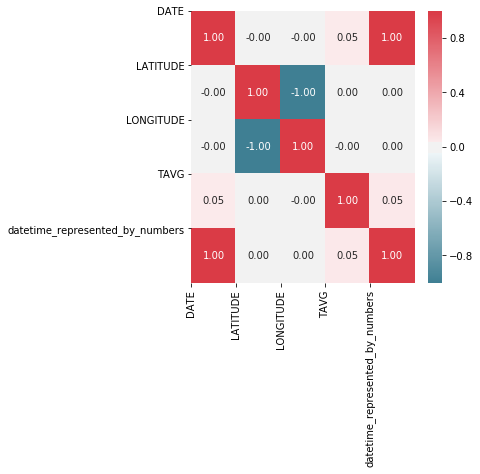

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = df_for_testing_correlation.corr()
    #Plot figsize
fig, ax = plt.subplots(figsize=(5, 5))
    #Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()


In [15]:
df_for_testing_correlation['datetime_represented_by_numbers']

4803418       1
4803419       2
4803440       3
4803441       4
4803442       5
4803443       6
4803444       7
4803445       8
4803446       9
4803447      10
4803448      11
4803449      12
4803450      13
4803451      14
4803452      15
4803453      16
4803454      17
4803455      18
4803456      19
4803457      20
4803458      21
4803459      22
4803460      23
4803461      24
4803462      25
4803463      26
4803464      27
4803465      28
4803466      29
4803467      30
           ... 
4804864    1447
4804865    1448
4804866    1449
4804867    1450
4804868    1451
4804869    1452
4804870    1453
4804871    1454
4804872    1455
4804873    1456
4804874    1457
4804875    1458
4804876    1459
4804877    1460
4804878    1461
4804879    1462
4804880    1463
4804881    1464
4804882    1465
4804883    1466
4804884    1467
4804885    1468
4804886    1469
4804887    1470
4804888    1471
4804889    1472
4804890    1473
4804891    1474
4804892    1475
4804893    1476
Name: datetime_represent

In [22]:
df_second = df_for_testing_correlation.drop(columns = ['STATION','LATITUDE','LONGITUDE','NAME','TAVG_ATTRIBUTES'])

In [23]:
df_second = df_second.drop(columns = ['datetime_represented_by_numbers'])

In [24]:
df_fourth = df_second
df_fourth.set_index('DATE', inplace=True)

In [25]:
df_second.head()

,TAVG
DATE,
1893-01-01,-12.08
1893-02-01,-7.49
1893-03-01,1.46
1893-04-01,9.00
1893-05-01,14.14


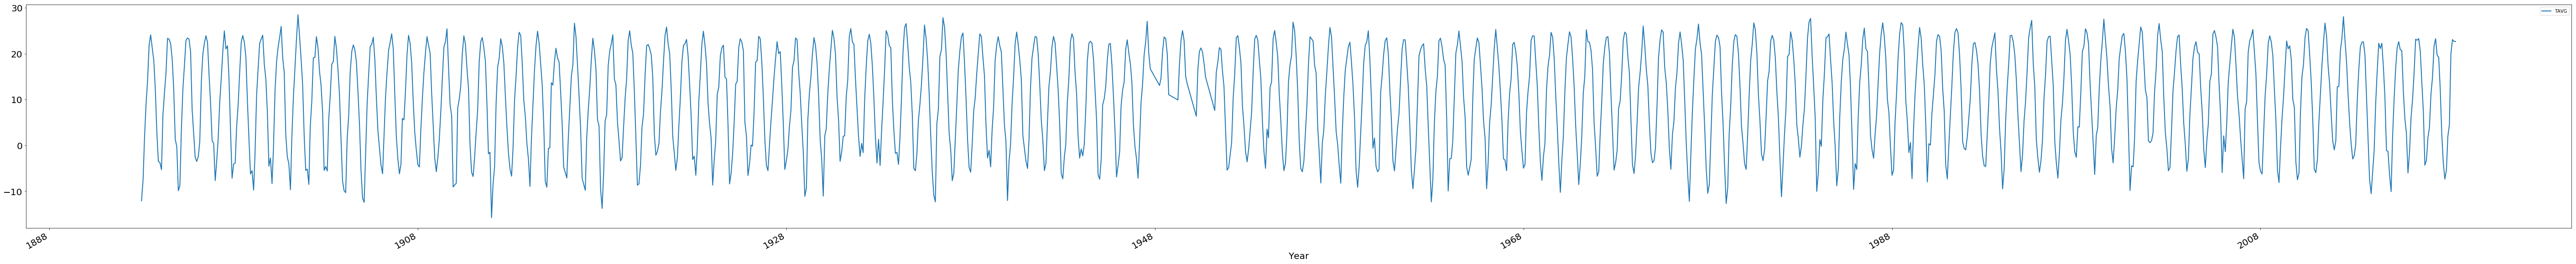

In [122]:
df_fourth.plot(figsize=(100,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [27]:
df_second.head()

,TAVG
DATE,
1893-01-01,-12.08
1893-02-01,-7.49
1893-03-01,1.46
1893-04-01,9.00
1893-05-01,14.14


In [29]:
df_for_testing_correlation.head()

,STATION,DATE,LATITUDE,LONGITUDE,NAME,TAVG,TAVG_ATTRIBUTES,datetime_represented_by_numbers
4803418,USC00134101,1893-01-01,41.6093,-91.5051,"IOWA CITY, IA US",-12.08,"1,6",1
4803419,USC00134101,1893-02-01,41.6093,-91.5051,"IOWA CITY, IA US",-7.49,",6",2
4803440,USC00134101,1893-03-01,41.6093,-91.5051,"IOWA CITY, IA US",1.46,"1,6",3
4803441,USC00134101,1893-04-01,41.6093,-91.5051,"IOWA CITY, IA US",9.00,",6",4
4803442,USC00134101,1893-05-01,41.6093,-91.5051,"IOWA CITY, IA US",14.14,",6",5


In [51]:
# Calculate Coefficients
 
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(dataset):
    x = list(df_for_testing_correlation['datetime_represented_by_numbers'])

# y = a*x + b with noise
    y = list(df_for_testing_correlation['TAVG'])

    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]
 
# calculate coefficients
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))


Coefficients: B0=9.402, B1=0.001


In [29]:
#Making the prediction:
B0=9.402; B1=0.001
y = B0*x + B1

In [30]:
import datetime
df_for_testing_correlation['DATE'] = df_for_testing_correlation['DATE'].apply(lambda x: datetime.datetime.strftime(x,'%Y%m'))

In [34]:
df_for_testing_correlation['DATE'] = df_for_testing_correlation['DATE'].apply(lambda x: int(x))

In [36]:
type(df_for_testing_correlation['DATE'].iloc[0])

numpy.int64

In [40]:
df_for_testing_correlation.tail()

,STATION,DATE,LATITUDE,LONGITUDE,NAME,TAVG,TAVG_ATTRIBUTES,datetime_represented_by_numbers
4804889,USC00134101,201804,41.6093,-91.5051,"IOWA CITY, IA US",4.50,",7",1472
4804890,USC00134101,201805,41.6093,-91.5051,"IOWA CITY, IA US",19.94,",7",1473
4804891,USC00134101,201806,41.6093,-91.5051,"IOWA CITY, IA US",23.05,",7",1474
4804892,USC00134101,201807,41.6093,-91.5051,"IOWA CITY, IA US",22.65,",7",1475
4804893,USC00134101,201808,41.6093,-91.5051,"IOWA CITY, IA US",22.64,",H",1476


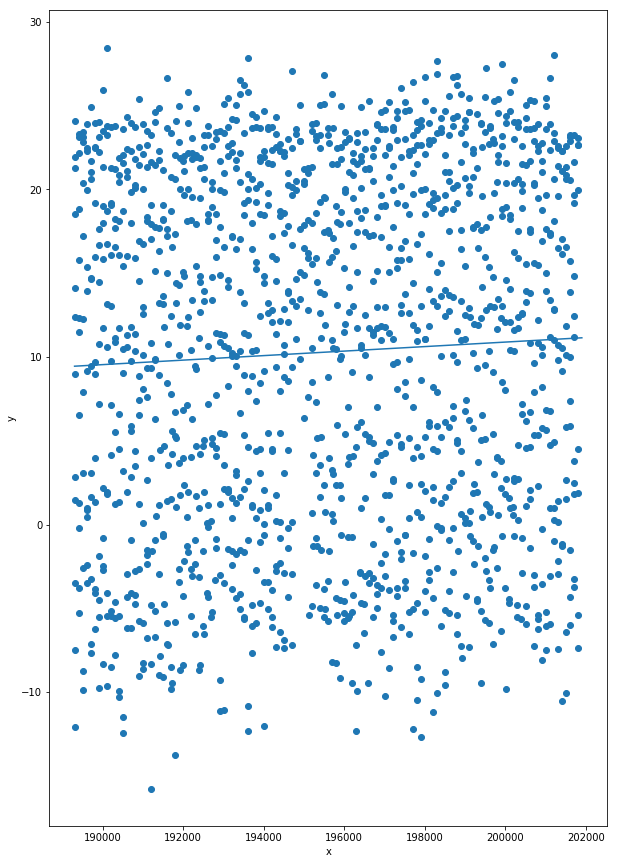

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = np.array(list(df_for_testing_correlation['DATE']))[:, np.newaxis]

# y = a*x + b with noise
y = np.array(list(df_for_testing_correlation['TAVG']))[:, np.newaxis]

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(189301,201900, 10)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(10, 15))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

In [60]:
import pandas as pd
df_1 = pd.read_csv('df_TAVG.csv')
df_1 = df.sort_values(by=['DATE'])
df_2 = df_1[df_1['STATION'] == 'USC00134101']

In [61]:
import datetime
df_2['DATE'] = df_2['DATE'].apply(lambda x: datetime.datetime.strftime(x,'%Y'))

/Users/jim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
len(df_2.groupby(['DATE']).count().index) == len(df_2.groupby(['DATE']).agg(np.mean)['TAVG'])

True

In [114]:
list_ =[]
for i in df_2.groupby(['DATE']).count().index:
    list_.append(int(i))
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = np.array(list_)[:, np.newaxis]

# y = a*x + b with noise
y = np.array(list(df_2.groupby(['DATE']).agg(np.mean)['TAVG']))[:, np.newaxis]

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(1893,2200, 10)
y_new = model.predict(x_new[:, np.newaxis])
a = list(y_new.reshape(10,))
b = list(x_new.reshape(10,))
dict_ = {}
for i in a:
    dict_[i] = i

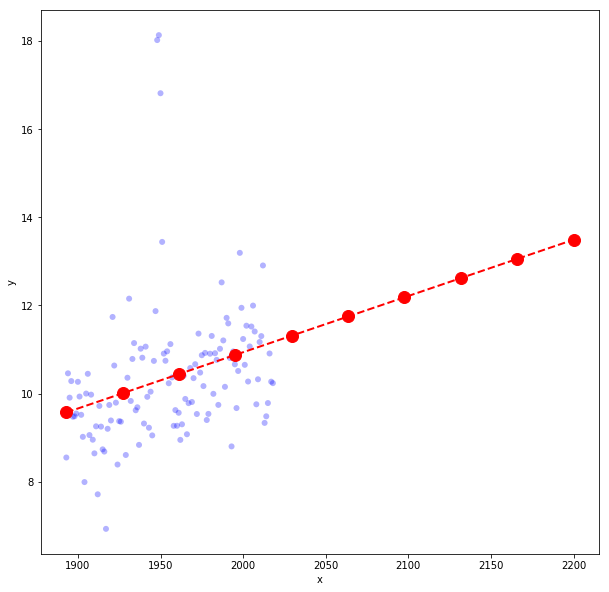

In [121]:
list_ =[]
for i in df_2.groupby(['DATE']).count().index:
    list_.append(int(i))
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = np.array(list_)[:, np.newaxis]

# y = a*x + b with noise
y = np.array(list(df_2.groupby(['DATE']).agg(np.mean)['TAVG']))[:, np.newaxis]

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(1893,2200, 10)
y_new = model.predict(x_new[:, np.newaxis])

a = list(y_new.reshape(10,))
b = list(x_new.reshape(10,))


# plot the results
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(x, y, c='b',alpha=0.3, edgecolors='none')
ax.plot(x_new, y_new,color='r', marker='o', linestyle='dashed',      linewidth=2, markersize=12)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()